In [2]:
!pip uninstall tensorflow tensorflow-intel tensorflow-gpu -y


In [3]:
!pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 33.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1


In [4]:
!pip install tensorflow


  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

In [6]:
train_data_dir = 'Dataset_new (1)/VARICOSE_VEINS_own/train/'
test_data_dir = 'Dataset_new (1)/VARICOSE_VEINS_own/test/'
valid_data_dir = 'Dataset_new (1)/VARICOSE_VEINS_own/valid/'


In [7]:
# Image dimensions
img_height, img_width = 224, 224
batch_size = 16

# Data augmentation for training set
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data augmentation for test and validation set (only rescaling)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [8]:
# Load and augment train data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Use categorical mode for more than two classes
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load validation data
valid_generator = test_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 210 images belonging to 2 classes.
Found 44 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [9]:
# Load MobileNetV2 pre-trained model without top (classification) layers
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add custom classification layers
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
predictions = tf.keras.layers.Dense(2, activation='softmax')(x)  # Use softmax activation for multi-class classification

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
# Create the model
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

# Evaluate the model on the test set
print("Evaluating model on test data...")
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc*100)

C:\Users\Vinod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 815ms/step - accuracy: 0.6224 - loss: 7.4920 - val_accuracy: 0.9062 - val_loss: 2.1537
Epoch 2/30
 1/13 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.7500 - loss: 4.7206

C:\Users\Vinod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7500 - loss: 4.7206 - val_accuracy: 0.9375 - val_loss: 1.8820
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 497ms/step - accuracy: 0.8580 - loss: 4.0015 - val_accuracy: 0.8125 - val_loss: 2.9767
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 0.0402 - val_accuracy: 0.8125 - val_loss: 2.1920
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 505ms/step - accuracy: 0.8773 - loss: 0.9618 - val_accuracy: 0.8125 - val_loss: 2.4107
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9375 - loss: 1.1795 - val_accuracy: 0.8750 - val_loss: 1.6812
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 509ms/step - accuracy: 0.8972 - loss: 0.8846 - val_accuracy: 0.9062 - val_loss: 0.7705
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 1.0000 - loss: 2.3022e-06 - val_accuracy: 0.9062 - val_loss: 1.1199
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 509ms/step - accuracy: 0.8966 - loss: 0.6184 - val_accuracy: 0.8750 - val_

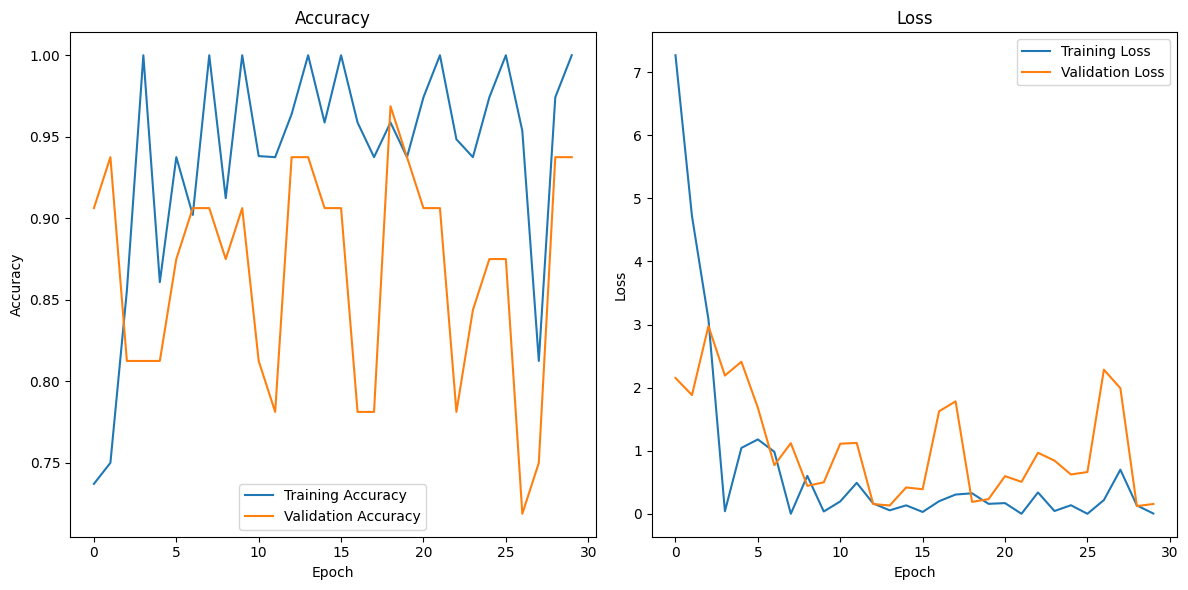

In [11]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')  # Set the y-label
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')  # Set the y-label
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
model.save("my_model.keras")  # Recommended format


In [16]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [21]:
# Load a test image for prediction
test_image_path = "C:/Users/Vinod/Downloads/Varicose Vein Detection/Varicose Vein Detection/Dataset_new (1)/VARICOSE_VEINS_own/test/varicose/58_jpeg.rf.8522e59123b36d6d23b859456e609e22.jpg"# Replace with the path to your test image
img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(img_height,img_width))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)

# Preprocess the image for prediction
img = img / 255.0  # Rescale to [0, 1]

# Make predictions
predictions = custom_model.predict(img)

# Assuming your classes are ['Normal', 'Varicose']
class_names = ['Normal', 'Varicose']
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]

print(f"The image is classified as: {predicted_class}")
print(f"Prediction probabilities: {predictions[0]}")

# If you want to see both classes and their probabilities:
for i in range(len(class_names)):
    print(f"{class_names[i]}: {predictions[0][i]}")
varicose_probability = predictions[0][class_names.index('Varicose')]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The image is classified as: Varicose
Prediction probabilities: [0.00374897 0.99625105]
Normal: 0.0037489719688892365
Varicose: 0.9962510466575623


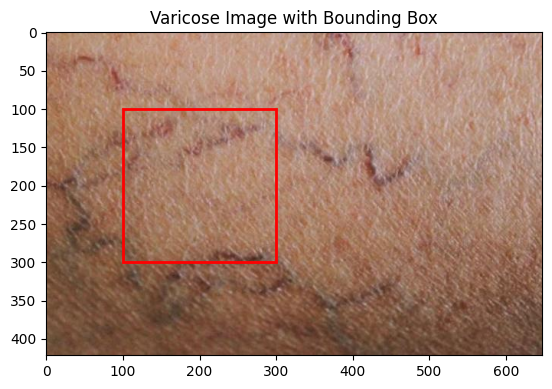

In [22]:
import matplotlib.patches as patches
# If it's Normal, display the Normal image
if predicted_class == 'Normal':
    img = tf.keras.preprocessing.image.load_img(test_image_path)
    plt.imshow(img)
    plt.title('Normal Image')
    plt.show()

# If it's Varicose, display the Varicose image with a bounding box
elif predicted_class == 'Varicose':
    varicose_image_path = test_image_path  # Replace with the path to the Varicose image
    varicose_img = tf.keras.preprocessing.image.load_img(varicose_image_path)
    varicose_img = tf.keras.preprocessing.image.img_to_array(varicose_img)

    # Define the coordinates for the bounding box (you may need to adjust these)
    x, y, w, h = 100, 100, 200, 200  # Example values, adjust as needed

    # Draw the bounding box on the Varicose image
    plt.imshow(varicose_img / 255.0)
    plt.title('Varicose Image with Bounding Box')
    plt.gca().add_patch(patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none'))
    plt.show()
